# Homework 1:  
Data Cleaning, Describing, and Visualization

## Description:
In this data science project, I will read in three different kinds of data sets (CSV, SQL, JSON). 

After I have read in these three data sets, I will:
1. Clean the data (handle missing data, handle outliers, scale the data, convert some data to categorical, etc.)
2. Describe the data with tables, statistics, and summaries. 
3. Visualize the data. 

### Import Libraries

In [43]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import scipy as sp
from scipy import stats

#%matplotlib inline shows plots in Jupyter Notebook browser
%matplotlib inline

### Import Dataset 1

In [2]:
#reading in the Pokemon data set downloaded from kaggle
pokemon_data = pd.read_csv(r"C:\Users\Spencer\Dropbox\School\Fall 2018\Machine Learning\Projects\Homework_1\Pokemon.csv", encoding="latin1")

### Summarize Data

Now that the data has been read into Python, we will want to preview the data set

In [3]:
#preview data
pokemon_data.info()
pokemon_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data preview, I can see: 13 variables, 800 observations, which features are missing data, and how variables are encoded.

In [4]:
#describe data
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From describing the data, I learn the basic information of min and max values, mean, and standard deviation. 

### Cleaning Data

Now I will print all of the columns so I can see exactly what information is included in the dataset.

In [5]:
#Printing all of the columns
print(pokemon_data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


I am going to drop the "#" column becasue it isn't needed in the analysis of this dataset.

In [6]:
#Dropping the "#" column
pokemon_data.drop(['#'], inplace=True, axis=1)

Now I am going to rename a couple of the columns with unnecessary spaces in their names to make them easier to deal with later.

In [26]:
#Renaming some of the columns
pokemon_data.rename(columns={'Type 1': 'Type_1', 'Type 2': "Type_2"}, inplace=True)

### Visualizing Data

Now that the data is clean, I will look for correlation.

In [15]:
#Look for correlation in the data
pokemon_data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


We can quickly see that a good amount of the data is correlated. One thing to notice is that "generation" does not have a high correlation with any of the other variables which means that pokemon didn't get meaningfully stronger or weaker as generations progressed. 

Now I am going to use a barplot to compare two categories: Type 1 of pokemon, and total stats (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP) to see which type of pokemon is the strongest. 

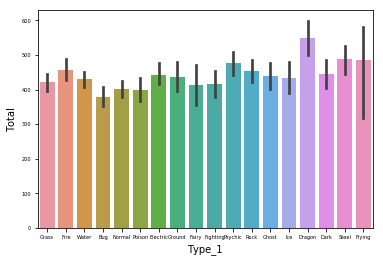

In [42]:
#Show barplot to compare two categories
sns.barplot(pokemon_data.Type_1, pokemon_data.Total).tick_params(labelsize=5)

From the barplot, we can see that the strongest type of pokemon based on total stats is the Dragon type. The weakest pokemon type is Bug type.

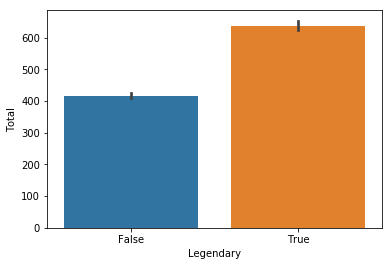

In [40]:
sns.barplot(pokemon_data.Legendary, pokemon_data.Total)

We can also see from the above barplot that legendary pokemon are stronger than non-legendary pokemon based on total stats.